# Handwritten Digit Classifier using  Tensorflow, Keras with 96.9% accuracy
MNIST Dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. This dataset is considered to be the "hello world" dataset for Computer Vision.

It has a training set of 60,000 examples and a test set of 10,000 examples for handwritten digits with a fixed dimension of 28X28 pixels. The goal is to correctly identify digits and find ways to improve the performance of the model.

In [79]:
# Import the required libraries
import tensorflow as tf
import numpy as np
mnsit = tf.keras.datasets.mnist

# Loading MNIST data
(x_train, y_train), (x_test, y_test) = mnsit.load_data()

x_train = tf.keras.utils.normalize(x_train, axis =1)
x_test = tf.keras.utils.normalize(x_test, axis =1)

Sequential API allows to create models layer-by-layer

In [ ]:
model = tf.keras.models.Sequential()

# Hidden Layers and Activation Function
In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs. ReLU stands for rectified linear unit, and is a type of activation function.

ReLU:f(x)=max(0,x)


The Softmax Activation represents a probability distribution over n different possible outcomes. Its values are all non-negative and sum to 1. For example, if the final output is: [0, 0.94, 0, 0, 0, 0, 0, 0.06, 0, 0] then it is most probable that the image is that of the digit 1

In [ ]:
# Flattening is converting the data into a 1-dimensional array for inputting it to the next layer
model.add(tf.keras.layers.Flatten())

# First Hidden Layer
model.add(tf.keras.layers.Dense(128, activation =tf.nn.relu))

# Second Hidden Layer
model.add(tf.keras.layers.Dense(128, activation =tf.nn.relu))

# Third Hidden Layer
model.add(tf.keras.layers.Dense(10, activation =tf.nn.softmax))

# Compiling the model

In [80]:
model.compile(optimizer= 'adam', loss ='sparse_categorical_crossentropy', metrics = ['Accuracy'])

The loss function used here is called categorical cross-entropy and is a loss function well-suited to comparing two probability distributions. The cross-entropy is a measure of how different your predicted distribution is from the target distribution.

Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. Optimizers are used to solve optimization problems by minimizing the loss function. In our case, we use the Adam Optimizer.

In [81]:
model.fit(x_train, y_train, epochs =3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2621 - Accuracy: 0.9238
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1063 - Accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0735 - Accuracy: 0.9770


# Evaluating the Model

We will now evaluate our model and find its accuracy

In [82]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print (val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0951 - Accuracy: 0.9704
0.09511736780405045 0.9703999757766724


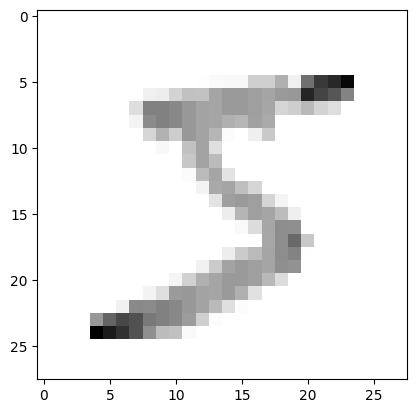

In [83]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap =plt.cm.binary)
plt.show()
#print(x_train[0])


# Saving the model

In [84]:
model.save ('epic_num_reader.model')

# Reloading the model

In [85]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

# Prediction

In [86]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [87]:
#print(predictions)

print(np.argmax(predictions[12]))

9


# Test

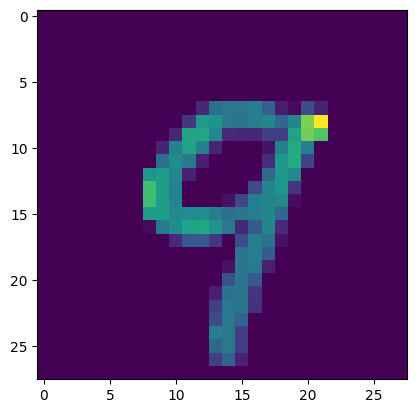

In [88]:
plt.imshow(x_test[12])